In [2]:
! ls preproc

PreprocessedPerceptionDataSubject1.h5
PreprocessedPerceptionDataSubject1.h5.zip
PreprocessedPerceptionDataSubject2.h5
PreprocessedPerceptionDataSubject3.h5
PreprocessedSleepDataSubject1.h5
PreprocessedSleepDataSubject2.h5
PreprocessedSleepDataSubject3.h5
propsSubject1.h5
propsSubject2.h5
propsSubject3.h5


In [3]:
import h5py
import os

In [4]:
root = "preproc"
perc = os.path.join(root, "PreprocessedPerceptionDataSubject1.h5")
sleep = os.path.join(root, "PreprocessedSleepDataSubject1.h5")
props = os.path.join(root, "propsSubject1.h5")

In [5]:
dfile = h5py.File(sleep, "r")
dfile.keys()

<KeysViewHDF5 ['data', 'metaData', 'metaDefinition']>

In [6]:
for key in dfile.keys():
    dset = dfile[key]
    try:
        print(key, dset.shape, dset.dtype, dset[0], end="\n\n")
    except:
        print(key, dset, type(key), end="\n\n")

data (235, 4039) float64 [-1.23439404 -0.48702744  1.19918902 ...  1.          1.
  1.        ]

metaData <HDF5 group "/metaData" (43 members)> <class 'str'>

metaDefinition (43,) |S33 b'0 = not voxelData, 1 = voxelData'



In [7]:
tfile = h5py.File(os.path.join(root, "PreprocessedSleepDataSubject2.h5"), "r")
tfile["data"].shape

(198, 3981)

In [8]:
data = dfile["data"]
mdata = dfile["metaData"]
mdef = dfile["metaDefinition"]
for i, key in enumerate(mdata):
    print(i, key, mdata[key].shape, " -- ",mdef[i])

0 EEG_sleep_score (1, 4039)  --  b'0 = not voxelData, 1 = voxelData'
1 FFA (1, 4039)  --  b'Value = X coordinate'
2 HVC (1, 4039)  --  b'Value = Y coordinate'
3 LOC (1, 4039)  --  b'Value = Z coordinate'
4 LVC (1, 4039)  --  b'0 = not FFA voxel, 1 = FFA voxel'
5 PPA (1, 4039)  --  b'0 = not HVC voxel, 1 = HVC voxel'
6 Synset_building_ID_02913152 (1, 4039)  --  b'0 = not LOC voxel, 1 = LOC voxel'
7 Synset_chair_ID_03001627 (1, 4039)  --  b'0 = not LVC voxel, 1 = LVC voxel'
8 Synset_character_ID_06818970 (1, 4039)  --  b'0 = not PPA voxel, 1 = PPA voxel'
9 Synset_clothing_ID_03051540 (1, 4039)  --  b'0 = not V1 voxel, 1 = V1 voxel'
10 Synset_code_ID_06355894 (1, 4039)  --  b'0 = not V2 voxel, 1 = V2 voxel'
11 Synset_cognition_ID_00023271 (1, 4039)  --  b'0 = not V3 voxel, 1 = V3 voxel'
12 Synset_external_body_part_ID_05225090 (1, 4039)  --  b'0 = not label, 1 = label'
13 Synset_geographical_area_ID_08574314 (1, 4039)  --  b'0 = absent, 1 = present'
14 Synset_girl_ID_10129825 (1, 4039)  -

In [9]:
pfile = h5py.File(props, "r")
pfile.keys()

<KeysViewHDF5 ['roiMask', 'roiNames', 'synsetNames', 'synsetPairs', 'xyz']>

In [10]:

for key in pfile.keys():
    dset = pfile[key]
    try:
        print(key, dset.shape, dset.dtype, dset[0], end="\n\n")
    except:
        print(key, dset, type(key), end="\n\n")

roiMask (8, 4010) float64 [0. 0. 0. ... 0. 0. 0.]

roiNames (8,) |S4 b'FFA'

synsetNames (26,) |S38 b'Synset_male_ID_09624168'

synsetPairs (201, 2) |S38 [b'Synset_character_ID_06818970' b'Synset_male_ID_09624168']

xyz (3, 4010) float64 [-67.5 -67.5 -67.5 ...  64.5  64.5  64.5]



In [11]:
rmask = pfile["roiMask"]
rnames = pfile["roiNames"]
xyz = pfile["xyz"]

print(rmask[0, :].sum(), rnames[0])
print(xyz[:, 2])

for region in range(len(rnames)):
    numel = rmask[region].sum() # number of "1" elements in the roi masks
    numel_d = sum(mdata[rnames[region]][0]) # number of "1" elements in corresponding mdata masks
    print(rnames[region], " -- ", numel, " -- ", numel_d) # should both be the same

537.0 b'FFA'
[-67.5 -43.5  -4.5]
b'FFA'  --  537.0  --  537.0
b'HVC'  --  1956.0  --  1956.0
b'LOC'  --  523.0  --  523.0
b'LVC'  --  2054.0  --  2054.0
b'PPA'  --  353.0  --  353.0
b'V1'  --  885.0  --  885.0
b'V2'  --  901.0  --  901.0
b'V3'  --  728.0  --  728.0


In [12]:
print(data.shape)
ffa_mask = rmask[0].astype(bool)
print(ffa_mask.shape)

(235, 4039)
(4010,)


In [14]:
import numpy as np
import pandas as pd

In [15]:
dfile = h5py.File(sleep, "r") #data file

data = dfile["data"]
mdata = dfile["metaData"]

#convert from h5 to a dictionary of np arrays, which pandas understands
mdata_dict_arr = {key: np.squeeze(np.array(val)) for key, val in mdata.items()}

meta_df = pd.DataFrame.from_dict(mdata_dict_arr)
data_df = np.array(data)

print(meta_df.shape)
meta_df.head()

(4039, 43)


,EEG_sleep_score,FFA,HVC,LOC,LVC,PPA,Synset_building_ID_02913152,Synset_chair_ID_03001627,Synset_character_ID_06818970,Synset_clothing_ID_03051540,...,V2,V3,X,Y,Z,design,label,sample_number,session_number,voxelData
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-67.5,-46.5,-1.5,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-67.5,-46.5,1.5,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-67.5,-43.5,-4.5,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-67.5,-43.5,-1.5,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-64.5,-52.5,-4.5,0.0,0.0,0.0,0.0,1.0


In [16]:
print(data_df.shape)

(235, 4039)


In [17]:
data_df

array([[-1.23439404e+00, -4.87027437e-01,  1.19918902e+00, ...,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00],
       [ 1.63373625e+00,  5.24539088e+00, -1.69498203e+00, ...,
         1.00000000e+00,  1.00000000e+00,  2.00000000e+00],
       [ 4.01640746e-01,  3.25192376e+00, -1.38049469e+00, ...,
         1.00000000e+00,  1.00000000e+00,  3.00000000e+00],
       ...,
       [-2.85550630e+00, -2.69055550e+00, -1.17711014e+00, ...,
         1.00000000e+00,  2.60000000e+01,  2.33000000e+02],
       [-1.89436357e-01, -1.59084747e+00,  2.13385080e+00, ...,
         1.00000000e+00,  2.60000000e+01,  2.34000000e+02],
       [-1.89219074e+00, -2.45376516e+00,  3.57550935e+00, ...,
         1.00000000e+00,  2.60000000e+01,  2.35000000e+02]])

In [18]:
import utils

masks, data =  utils.load_data(1)

In [19]:
masks.head()

,EEG_sleep_score,FFA,HVC,LOC,LVC,PPA,Synset_building_ID_02913152,Synset_chair_ID_03001627,Synset_character_ID_06818970,Synset_clothing_ID_03051540,...,V2,V3,X,Y,Z,design,label,sample_number,session_number,voxelData
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-67.5,-46.5,-1.5,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-67.5,-46.5,1.5,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-67.5,-43.5,-4.5,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-67.5,-43.5,-1.5,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-64.5,-52.5,-4.5,0.0,0.0,0.0,0.0,1.0


In [20]:
data

array([[-1.23439404e+00, -4.87027437e-01,  1.19918902e+00, ...,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00],
       [ 1.63373625e+00,  5.24539088e+00, -1.69498203e+00, ...,
         1.00000000e+00,  1.00000000e+00,  2.00000000e+00],
       [ 4.01640746e-01,  3.25192376e+00, -1.38049469e+00, ...,
         1.00000000e+00,  1.00000000e+00,  3.00000000e+00],
       ...,
       [-2.85550630e+00, -2.69055550e+00, -1.17711014e+00, ...,
         1.00000000e+00,  2.60000000e+01,  2.33000000e+02],
       [-1.89436357e-01, -1.59084747e+00,  2.13385080e+00, ...,
         1.00000000e+00,  2.60000000e+01,  2.34000000e+02],
       [-1.89219074e+00, -2.45376516e+00,  3.57550935e+00, ...,
         1.00000000e+00,  2.60000000e+01,  2.35000000e+02]])

In [38]:
print(f"data shape: {data.shape}")

data shape: (235, 4039)


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
import time

from sklearn.model_selection import train_test_split
from utils import load_data

In [22]:
print(masks.shape, data.shape)

(4039, 43) (235, 4039)


In [23]:
from utils import load_data, DataHandler
from plotting import plot_confusion_matrix, classification_report

In [29]:
datahandler = DataHandler(masks, data, test_size=0.2)
trainx = datahandler.get_feature(["FFA", "HVC", "LOC", "LVC", "PPA", "V1", "V2", "V3"], "train")


In [26]:
print(trainx.shape)


(188, 7937)


In [62]:
datahandler.get_label_names()[11]

'implement'

In [28]:
testx = datahandler.get_feature(["FFA", "HVC", "LOC", "LVC", "PPA", "V1", "V2", "V3"], "test")
testy = datahandler.get_labels('girl', split_set = 'test')


In [150]:
testy.shape

(47,)

In [156]:
words = datahandler.get_label_names()
trainx = datahandler.get_feature("FFA", "train")

for x in words:
    trainy = datahandler.get_labels(y)
    start = time.time()
    #make some temporary variables so you can change this easily
    tmp_vectors = trainx
    tmp_labels = trainy
    
    print("Fitting the classifier to the training set")
    # a dictionary of hyperparameters: key is the name of the parameter, value is a list of values to test
    param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
                  'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1],
                  'kernel': ['linear','rbf']}
    # make a classifier by searching over a classifier and the parameter grid
    clf = GridSearchCV(SVC(class_weight='balanced'), param_grid)
    
    # we have a "good" classifier (according to GridSearchCV), how's it look
    clf = clf.fit(tmp_vectors, tmp_labels)
    #print("Best estimator found by grid search:")
    #print(clf.best_estimator_)
    #print("Best parameters found by grid search:")
    #print(clf.best_params_)
    
    end = time.time()
    #print("Runtime",end - start)
    
    predict_vectors = testx
    true_labels = testy
    #
    ##print("Predicting names on the test set")
    pred_labels = clf.predict(predict_vectors)
    #
    #print(classification_report(true_labels, pred_labels))
    #print(confusion_matrix(true_labels, pred_labels))
    #fig = plot_confusion_matrix(true_labels, pred_labels, y)
        
        
        
        

Fitting the classifier to the training set
Fitting the classifier to the training set
Fitting the classifier to the training set
Fitting the classifier to the training set
Fitting the classifier to the training set
Fitting the classifier to the training set
Fitting the classifier to the training set
Fitting the classifier to the training set
Fitting the classifier to the training set
Fitting the classifier to the training set


KeyboardInterrupt: 

In [31]:
start = time.time()
trainy = datahandler.get_labels('building')

#make some temporary variables so you can change this easily
tmp_vectors = trainx
tmp_labels = trainy

print("Fitting the classifier to the training set")
# a dictionary of hyperparameters: key is the name of the parameter, value is a list of values to test
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1],
              'kernel': ['linear','rbf']}
# make a classifier by searching over a classifier and the parameter grid
clf = GridSearchCV(SVC(class_weight='balanced'), param_grid)

# we have a "good" classifier (according to GridSearchCV), how's it look
clf = clf.fit(tmp_vectors, tmp_labels)

end = time.time()
print("Runtime",end - start)



Fitting the classifier to the training set
Runtime 20.834657907485962


In [32]:
start = time.time()
trainy = datahandler.get_labels('chair')

#make some temporary variables so you can change this easily
tmp_vectors = trainx
tmp_labels = trainy

print("Fitting the classifier to the training set")
# a dictionary of hyperparameters: key is the name of the parameter, value is a list of values to test
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1],
              'kernel': ['linear','rbf']}
# make a classifier by searching over a classifier and the parameter grid
clf = GridSearchCV(SVC(class_weight='balanced'), param_grid)

# we have a "good" classifier (according to GridSearchCV), how's it look
clf = clf.fit(tmp_vectors, tmp_labels)

end = time.time()
print("Runtime",end - start)


Fitting the classifier to the training set
Runtime 21.155591011047363


In [34]:
start = time.time()
trainy = datahandler.get_labels('line')

#make some temporary variables so you can change this easily
tmp_vectors = trainx
tmp_labels = trainy

print("Fitting the classifier to the training set")
# a dictionary of hyperparameters: key is the name of the parameter, value is a list of values to test
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1],
              'kernel': ['linear','rbf']}
# make a classifier by searching over a classifier and the parameter grid
clf = GridSearchCV(SVC(class_weight='balanced'), param_grid)

# we have a "good" classifier (according to GridSearchCV), how's it look
clf = clf.fit(tmp_vectors, tmp_labels)

end = time.time()
print("Runtime",end - start)


Fitting the classifier to the training set
Runtime 18.722277879714966


In [36]:
start = time.time()
trainy = datahandler.get_labels('table')

#make some temporary variables so you can change this easily
tmp_vectors = trainx
tmp_labels = trainy

print("Fitting the classifier to the training set")
# a dictionary of hyperparameters: key is the name of the parameter, value is a list of values to test
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1],
              'kernel': ['linear','rbf']}
# make a classifier by searching over a classifier and the parameter grid
clf = GridSearchCV(SVC(class_weight='balanced'), param_grid)

# we have a "good" classifier (according to GridSearchCV), how's it look
clf = clf.fit(tmp_vectors, tmp_labels)

end = time.time()
print("Runtime",end - start)


Fitting the classifier to the training set
Runtime 22.178952932357788


In [37]:
start = time.time()
trainy = datahandler.get_labels('male')

#make some temporary variables so you can change this easily
tmp_vectors = trainx
tmp_labels = trainy

print("Fitting the classifier to the training set")
# a dictionary of hyperparameters: key is the name of the parameter, value is a list of values to test
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1],
              'kernel': ['linear','rbf']}
# make a classifier by searching over a classifier and the parameter grid
clf = GridSearchCV(SVC(class_weight='balanced'), param_grid)

# we have a "good" classifier (according to GridSearchCV), how's it look
clf = clf.fit(tmp_vectors, tmp_labels)

end = time.time()
print("Runtime",end - start)


Fitting the classifier to the training set
Runtime 25.072429180145264


In [52]:
start = time.time()
trainy = datahandler.get_labels('window')
#make some temporary variables so you can change this easily
tmp_vectors = trainx
tmp_labels = trainy

print("Fitting the classifier to the training set")
# a dictionary of hyperparameters: key is the name of the parameter, value is a list of values to test
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1],
              'kernel': ['linear','rbf']}
# make a classifier by searching over a classifier and the parameter grid
clf = GridSearchCV(SVC(class_weight='balanced'), param_grid)

# we have a "good" classifier (according to GridSearchCV), how's it look
clf = clf.fit(tmp_vectors, tmp_labels)

end = time.time()
print("Runtime",end - start)


Fitting the classifier to the training set
Runtime 19.78991985321045


In [56]:
start = time.time()
trainy = datahandler.get_labels('external_body_part')

#make some temporary variables so you can change this easily
tmp_vectors = trainx
tmp_labels = trainy

print("Fitting the classifier to the training set")
# a dictionary of hyperparameters: key is the name of the parameter, value is a list of values to test
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1],
              'kernel': ['linear','rbf']}
# make a classifier by searching over a classifier and the parameter grid
clf = GridSearchCV(SVC(class_weight='balanced'), param_grid)

# we have a "good" classifier (according to GridSearchCV), how's it look
clf = clf.fit(tmp_vectors, tmp_labels)

end = time.time()
print("Runtime",end - start)


Fitting the classifier to the training set
Runtime 22.63399887084961


In [59]:
start = time.time()
trainy = datahandler.get_labels('group')

#make some temporary variables so you can change this easily
tmp_vectors = trainx
tmp_labels = trainy

print("Fitting the classifier to the training set")
# a dictionary of hyperparameters: key is the name of the parameter, value is a list of values to test
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1],
              'kernel': ['linear','rbf']}
# make a classifier by searching over a classifier and the parameter grid
clf = GridSearchCV(SVC(class_weight='balanced'), param_grid)

# we have a "good" classifier (according to GridSearchCV), how's it look
clf = clf.fit(tmp_vectors, tmp_labels)

end = time.time()
print("Runtime",end - start)

Fitting the classifier to the training set
Runtime 23.49355721473694


In [61]:
start = time.time()
trainy = datahandler.get_labels('shape')

#make some temporary variables so you can change this easily
tmp_vectors = trainx
tmp_labels = trainy

print("Fitting the classifier to the training set")
# a dictionary of hyperparameters: key is the name of the parameter, value is a list of values to test
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1],
              'kernel': ['linear','rbf']}
# make a classifier by searching over a classifier and the parameter grid
clf = GridSearchCV(SVC(class_weight='balanced'), param_grid)

# we have a "good" classifier (according to GridSearchCV), how's it look
clf = clf.fit(tmp_vectors, tmp_labels)

end = time.time()
print("Runtime",end - start)

Fitting the classifier to the training set
Runtime 20.796457052230835


In [63]:
start = time.time()
trainy = datahandler.get_labels('implement')

#make some temporary variables so you can change this easily
tmp_vectors = trainx
tmp_labels = trainy

print("Fitting the classifier to the training set")
# a dictionary of hyperparameters: key is the name of the parameter, value is a list of values to test
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1],
              'kernel': ['linear','rbf']}
# make a classifier by searching over a classifier and the parameter grid
clf = GridSearchCV(SVC(class_weight='balanced'), param_grid)

# we have a "good" classifier (according to GridSearchCV), how's it look
clf = clf.fit(tmp_vectors, tmp_labels)

end = time.time()
print("Runtime",end - start)

Fitting the classifier to the training set
Runtime 19.893463850021362


/Users/samtadian/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/samtadian/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/samtadian/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98        45
         1.0       0.00      0.00      0.00         2

    accuracy                           0.96        47
   macro avg       0.48      0.50      0.49        47
weighted avg       0.92      0.96      0.94        47

Predicting Dreams with key word: building
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99        46
         1.0       0.00      0.00      0.00         1

    accuracy                           0.98        47
   macro avg       0.49      0.50      0.49        47
weighted avg       0.96      0.98      0.97        47

Predicting Dreams with key word: chair


/Users/samtadian/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/samtadian/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/samtadian/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.96        43
         1.0       0.00      0.00      0.00         4

    accuracy                           0.91        47
   macro avg       0.46      0.50      0.48        47
weighted avg       0.84      0.91      0.87        47

Predicting Dreams with key word: character
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.96        43
         1.0       0.00      0.00      0.00         4

    accuracy                           0.91        47
   macro avg       0.46      0.50      0.48        47
weighted avg       0.84      0.91      0.87        47

Predicting Dreams with key word: clothing


/Users/samtadian/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/samtadian/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/samtadian/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98        45
         1.0       0.00      0.00      0.00         2

    accuracy                           0.96        47
   macro avg       0.48      0.50      0.49        47
weighted avg       0.92      0.96      0.94        47

Predicting Dreams with key word: code
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98        45
         1.0       0.00      0.00      0.00         2

    accuracy                           0.96        47
   macro avg       0.48      0.50      0.49        47
weighted avg       0.92      0.96      0.94        47

Predicting Dreams with key word: cognition


/Users/samtadian/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/samtadian/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/samtadian/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98        45
         1.0       0.00      0.00      0.00         2

    accuracy                           0.96        47
   macro avg       0.48      0.50      0.49        47
weighted avg       0.92      0.96      0.94        47

Predicting Dreams with key word: external_body_part
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94        42
         1.0       0.00      0.00      0.00         5

    accuracy                           0.89        47
   macro avg       0.45      0.50      0.47        47
weighted avg       0.80      0.89      0.84        47

Predicting Dreams with key word: geographical_area


/Users/samtadian/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/samtadian/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/samtadian/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98        45
         1.0       0.00      0.00      0.00         2

    accuracy                           0.96        47
   macro avg       0.48      0.50      0.49        47
weighted avg       0.92      0.96      0.94        47

Predicting Dreams with key word: girl
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99        46
         1.0       0.00      0.00      0.00         1

    accuracy                           0.98        47
   macro avg       0.49      0.50      0.49        47
weighted avg       0.96      0.98      0.97        47

Predicting Dreams with key word: group


/Users/samtadian/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/samtadian/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/samtadian/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99        46
         1.0       0.00      0.00      0.00         1

    accuracy                           0.98        47
   macro avg       0.49      0.50      0.49        47
weighted avg       0.96      0.98      0.97        47

Predicting Dreams with key word: illustration
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97        44
         1.0       0.00      0.00      0.00         3

    accuracy                           0.94        47
   macro avg       0.47      0.50      0.48        47
weighted avg       0.88      0.94      0.91        47

Predicting Dreams with key word: implement


/Users/samtadian/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/samtadian/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/samtadian/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97        44
         1.0       0.00      0.00      0.00         3

    accuracy                           0.94        47
   macro avg       0.47      0.50      0.48        47
weighted avg       0.88      0.94      0.91        47

Predicting Dreams with key word: line
              precision    recall  f1-score   support

         0.0       0.47      1.00      0.64        22
         1.0       0.00      0.00      0.00        25

    accuracy                           0.47        47
   macro avg       0.23      0.50      0.32        47
weighted avg       0.22      0.47      0.30        47

Predicting Dreams with key word: male


/Users/samtadian/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/samtadian/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/samtadian/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97        44
         1.0       0.00      0.00      0.00         3

    accuracy                           0.94        47
   macro avg       0.47      0.50      0.48        47
weighted avg       0.88      0.94      0.91        47

Predicting Dreams with key word: material
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98        45
         1.0       0.00      0.00      0.00         2

    accuracy                           0.96        47
   macro avg       0.48      0.50      0.49        47
weighted avg       0.92      0.96      0.94        47

Predicting Dreams with key word: natural_object
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        47

    accuracy                           1.00        47
   macro avg       1.00      1.00      1.00        47
weighted avg       1.00      1.00     

/Users/samtadian/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/samtadian/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/samtadian/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.96        43
         1.0       0.00      0.00      0.00         4

    accuracy                           0.91        47
   macro avg       0.46      0.50      0.48        47
weighted avg       0.84      0.91      0.87        47

Predicting Dreams with key word: room
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        47

    accuracy                           1.00        47
   macro avg       1.00      1.00      1.00        47
weighted avg       1.00      1.00      1.00        47

Predicting Dreams with key word: shape
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        47

    accuracy                           1.00        47
   macro avg       1.00      1.00      1.00        47
weighted avg       1.00      1.00      1.00        47

Predicting Dreams with key word: table
           

/Users/samtadian/Downloads/CMSE-202-Dream-Project/plotting.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1)
/Users/samtadian/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/samtadian/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier,

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99        46
         1.0       0.00      0.00      0.00         1

    accuracy                           0.98        47
   macro avg       0.49      0.50      0.49        47
weighted avg       0.96      0.98      0.97        47

Predicting Dreams with key word: way
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98        45
         1.0       0.00      0.00      0.00         2

    accuracy                           0.96        47
   macro avg       0.48      0.50      0.49        47
weighted avg       0.92      0.96      0.94        47

Predicting Dreams with key word: window
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98        45
         1.0       0.00      0.00      0.00         2

    accuracy                           0.96        47
   macro avg       0.48      0.50      0.49        

/Users/samtadian/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/samtadian/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/samtadian/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/

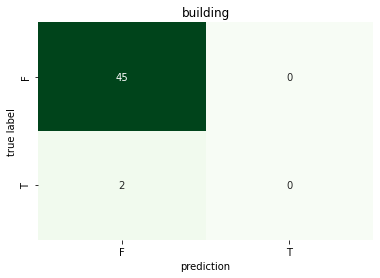

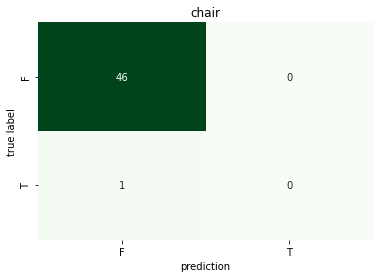

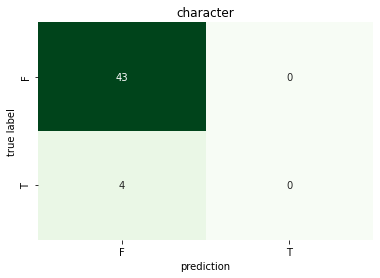

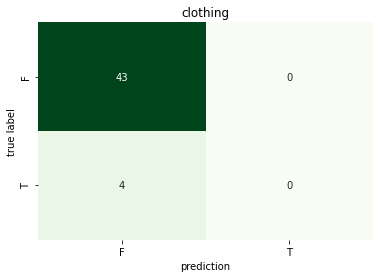

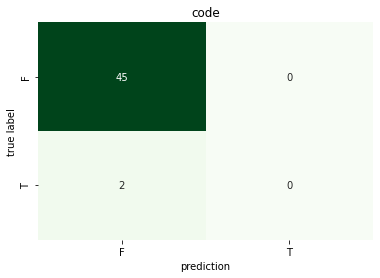

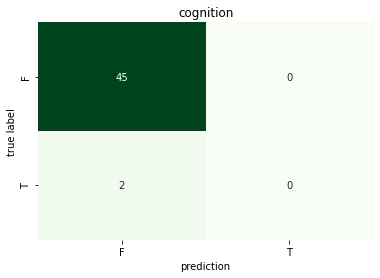

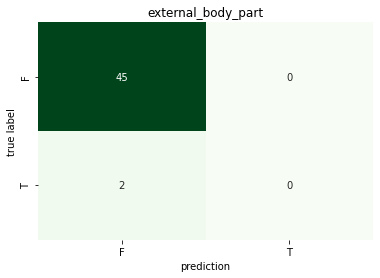

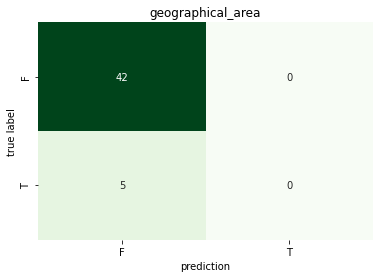

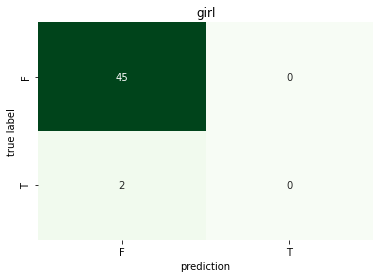

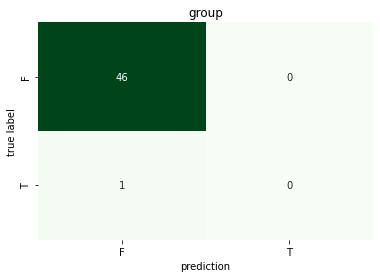

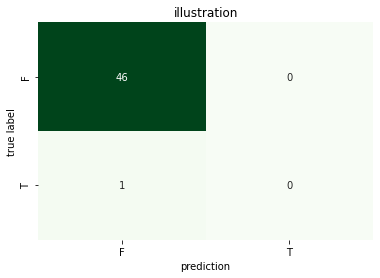

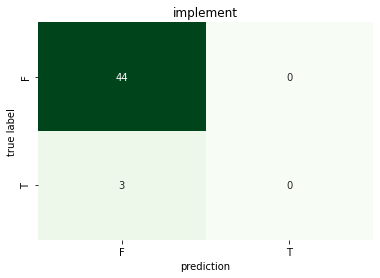

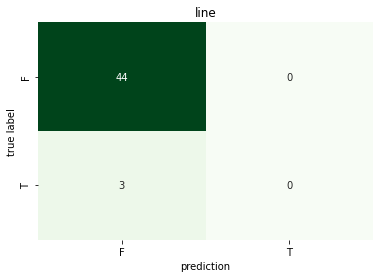

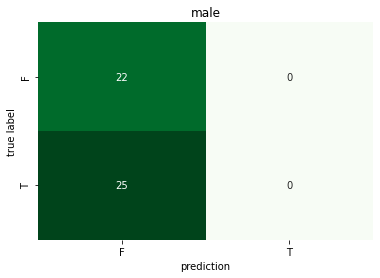

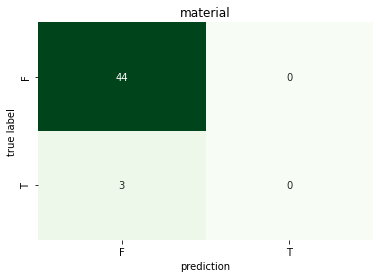

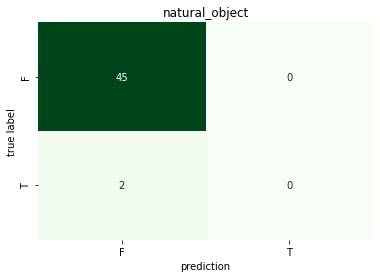

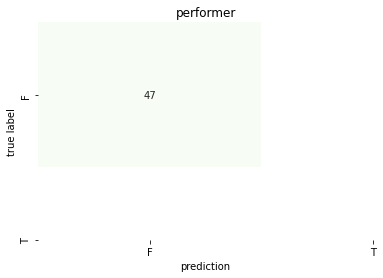

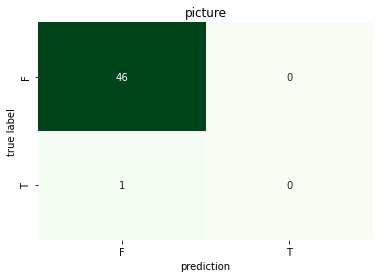

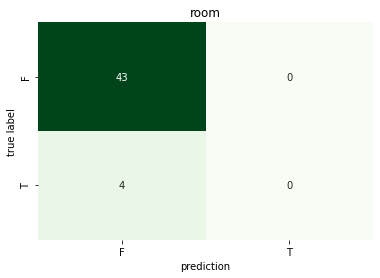

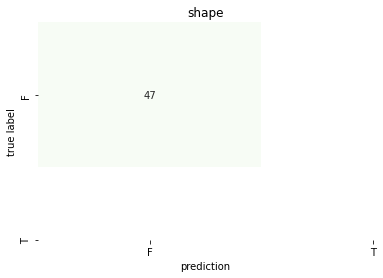

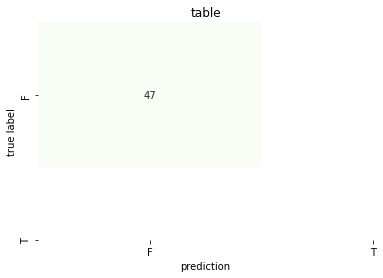

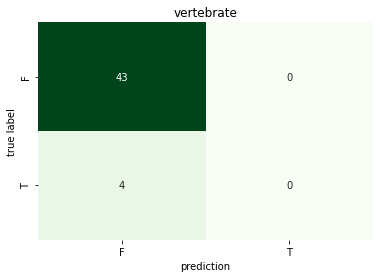

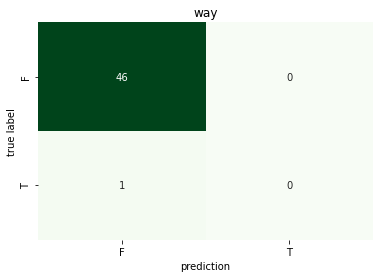

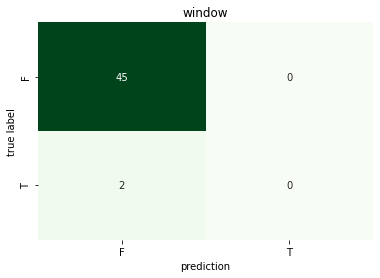

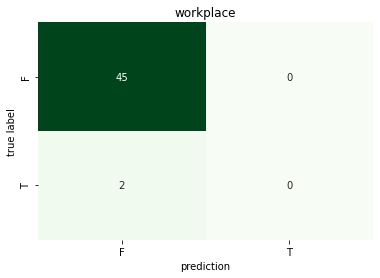

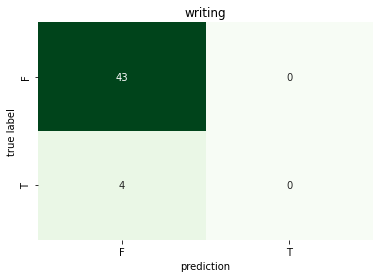

In [70]:
testx = datahandler.get_feature(["FFA", "HVC", "LOC", "LVC", "PPA", "V1", "V2", "V3"], "test")
predict_vectors = testx
words = datahandler.get_label_names()

for w in words:
    testy = datahandler.get_labels(w, split_set = 'test')
    true_labels = testy

    pred_labels = clf.predict(predict_vectors)
    
    print(classification_report(true_labels, pred_labels))
    print("Predicting Dreams with key word:", w)
    
    fig = plot_confusion_matrix(testy, pred_labels, w)